## LiME_binning parameters 
Running this notebook will generate a graph where the number of clusters, the cardinality of the largest cluster and the number of non grouped reads are plotted for each (alpha, t) pair that has been provided in input to LiME_binning tool.

If one of the three values to be plotted (number of clusters, cardinality of the largest cluster or number of non grouped reads) is unknown, the notebook "LiME_binning_output_analysis" should be run before this one.


### Input file format

The notebook receives in input a .txt file organized in four colums:  <i>(alpha,t) num_clusters max_set_cardinality non_grouped reads</i>. <br>
-- The four values must be separated by a whitespace. <br>
-- The file should contain one line per (alpha, t) pair tested. <br>
-- For each line the four above described parameters have to be specified. <br>
-- See LiME_binning_parameters_example.txt file as an input example. 

In [1]:
# libraries
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# path to input file 
input_file = "LiME_binning_parameters_example.txt"

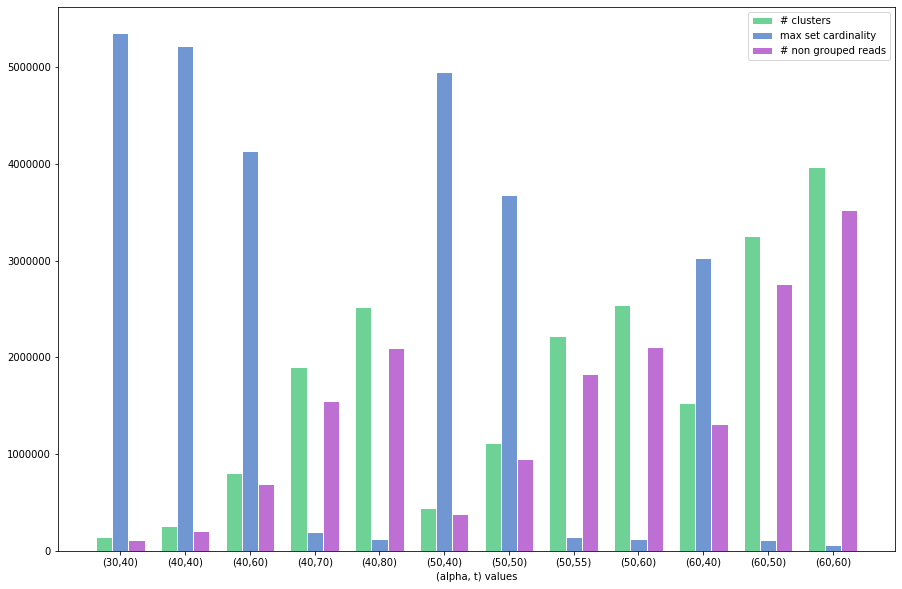

In [3]:
input = open(input_file, 'r')

# list for (alpha, t) pairs
labels = [] 

# list of number of clusters per (alpha, t) pair
bars1 = [] 

# list of max set cardinality per (alpha, t) pair
bars2 = []

# list of non grouped reads per (alpha, t) par
bars3 = []

for line in input:
    line_items = line.split()
    
    if len(line_items) != 4:
        print("Error in input file!")
        break
    
    labels.append(line_items[0])
    bars1.append(int(line_items[1]))
    bars2.append(int(line_items[2]))
    bars3.append(int(line_items[3]))
                  
input.close()

# set width of bars
barWidth = 0.25

fig = plt.figure(figsize=(15,10))

# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

# Make the plot
plt.bar(r1, bars1, color='#6ED196', width=barWidth, edgecolor='white', label='# clusters')
plt.bar(r2, bars2, color='#7097D2', width=barWidth, edgecolor='white', label='max set cardinality')
plt.bar(r3, bars3, color='#BE6FD3', width=barWidth, edgecolor='white', label='# non grouped reads')
 
# Add xticks on the middle of the group bars
plt.xlabel('(alpha, t) values')
plt.xticks([r + barWidth for r in range(len(bars1))], labels)
 
# save the figure
fig.savefig('output/LimeBinningParametersOutputGraph.png', bbox_inches='tight', dpi=fig.dpi)

# Create legend & Show graphic
plt.legend()

plt.show()